In [18]:

import numpy as np 
import pandas as pd

import tensorflow.keras as keras
import os

pd.set_option('display.max_colwidth', -1)



/home/shubham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Conv1D, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('../data/IMDB Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [10]:
df_train, df_test = train_test_split(df, test_size=0.3)
print(df_train.shape)
print(df_test.shape)

(35000, 2)
(15000, 2)


In [11]:
df_train['sentiment'] = df_train['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df_test['sentiment'] = df_test['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

/home/shubham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shubham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_train['review'] = df_train['review'].str.replace('<br />', '')
df_test['review'] = df_test['review'].str.replace('<br />', '')


/home/shubham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shubham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df_train.head()

,review,sentiment
37028,"Man has been to the farthest reaches of the earth and now he is traveling to new worlds. But with new worlds come ancient evils... the vampires of space. And not just a handful but entire tribes. In this film (which I saw as ""Bloodsuckers"" but I guess also goes as ""Vampires Wars"") we see what happens when the imperialist earthlings meet the imperialist vampires.I will make this review very short because it's undeserving of a good review. The best I can say for this film is it has a good cast of b-list and upcoming stars. Natassia Malthe was Quintana, and was far more attractive here than in ""Bloodrayne 2"". Michael Ironside is Muco, and is always a fan favorite (as I say, he's the poor man's Jack Nicholson). And we even get Carrie-Ann Fleming as ""Damian's wife"", who horror fans will now recognize as the eponymous Jenifer from Dario Argento's ""Jenifer"". So this movie, as bad as it is, isn't without some names attached... but the same can be said of Uwe Boll's work.The concept of the military tracking and killing vampires in space isn't necessarily a bad idea, but it easily falls into the realm of ""cheese"" and this film falls hard. The acting, especially from the vampires, is over the top and I just didn't find the explanations of their existence very convincing. Worst of all, the vampire tribes have the names ""Voorhess"" and ""Leatherfaces"". I understand this was supposed to be a clever reference for the horror fans, but it wasn't clever at all. It just sounded dumb and out of place (unlike the much more subtle references in James Gunn's ""Slither"", such as naming stores after lesser-known horror directors).That's all I want to say. If you can stand lots of cheese (on this day I couldn't and I'm from Wisconsin) and want to see average actors with poor costumes fight vampires in space (although ""space"" looks a lot like any other forest on earth) check this one out, if you can find it. I don't personally recommend this when you can watch other cheesy vampires films (Jon Carpenter's ""Vampires"") or other cheesy space movies. Or maybe even some good ones. But, hey, do your thing.",0
36287,"I expected so much more than what I received from watching this movie. It is not that I object to literary license, (if that is what it should be called) especially when there is no overt attempt to say ""based on a true story."" But this movie is about Beethoven -- a real historical person who is so widely known and so deeply embedded into our musical experiences and I expected the movie to be true to history at least in the primary elements. This movie took such great exception from the historic record it could only disappoint.My assumption (because I had not researched the movie at all) was that it was true. Half way through, I stopped the movie to look it up on IMDb. The rest of the movie was a remarkably different experience. I was relieved that this was not accurate with history because it was so hard to believe a major portion of the story. To enjoy this movie, I was required to recognize it as a fantasy, a ""what if it was like this"" story. The movie lacked this honest disclaimer.What disappointed me most was the fictionalized conducting of the 9th symphony. The very concept portrayed in the film stretched my imagination to the point of incredulity. I ended up doubting anything was true to history other than Ludwig van Beethoven and his relationship with Karl van Beethoven.I really enjoyed the performance of Ed Harris - an exceptional actor who knows how to play a role and keep himself out of it and that was about it and for that I give it a 3/10.Those who portend that this movie is as good as or better than Amadeus have not a clue about either either composers life and are looking only for what this movie really is, for in the end it was a cheap novel of a story - pulp fiction.",0
11338,"The movie contains a very short scene of Deneuve in a bathtub. She looks absolutely stunning for a lady age 5

In [14]:
y_train = df_train['sentiment']

X_train = df_train['review']
y_test = df_test['sentiment']
X_test = df_test['review']


In [15]:
max_review_length = 250

In [16]:
# X_train = sequence.pad_sequences(X_train.values, maxlen = 500)
# X_test = sequence.pad_sequences(X_test)

In [20]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [21]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(X_train, maxlen=1000)

In [22]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(X_test, maxlen=1000)

In [23]:
print(X_train.shape)
print(X_test.shape)

(35000, 1000)
(15000, 1000)


In [24]:
model = Sequential()
model.add(Embedding(1000, 64, input_length=X_train.shape[1]))
model.add(LSTM(200))
model.add(Dropout(0.25))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 200)               212000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 276,201
Trainable params: 276,201
Non-trainable params: 0
_________________________________________________________________


In [25]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_data=(X_test, y_test))

Epoch 1/10


In [19]:
def plot_history(history):
    fig = plt.figure(figsize = (20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'], label='Train Acc')
    plt.plot(history.history['val_acc'], label='Validation Acc')
    plt.title("Accuracy")
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title("Loss")
    plt.legend()
    plt.grid()
    
    plt.show()

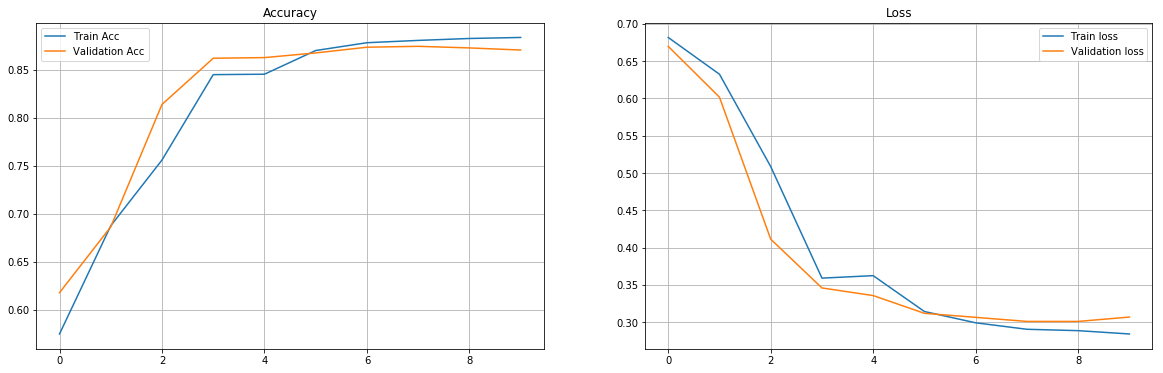

In [20]:
plot_history(history)